# Prédiction du cours des actions d'Apple 

### L'objectif de cette partie est de savoir si le prix de l'action d'Apple va augmenter au jour J+1 en connaissant le cours des actions jusqu'au jour J.

## 0 - Préparatifs généraux

On commence par importer toutes les **biblothèques** nécéssaires

In [223]:
import matplotlib.pyplot as plt # Pour les graphiques
import numpy as np
import yfinance as yf # Pour extraire les données de yahoo finance
import pandas as pd # Pour manipuler des data frames
from datetime import datetime

## I - Récupération des données 

Concernant la **récupération des données**, on récupére un fichier CSV sur **Yahoo Finance** qui comporte le cours des actions de Apple avec diverses informations : prix d'ouverture, de fermeture, high, low, volume de transactions..

On commence tout d'abord par la création du **"Ticker"** pour Apple, nécéssaire pour extraire les données sur Yahoo Finance:

In [224]:
APL = "AAPL"

In [225]:
data = yf.Ticker(APL) # Extraction avec la fonction yf.Ticker de yfinance

Puis, pour la récupération des données, on a deux possibilités.
La première est d'entrer la date du jour pour extraire le CSV le plus récent possible sur yahoo finance :

In [226]:
"""user_date_input = input("Entrez la date d'aujourd'hui (format AAAA-MM-JJ): ")
input_date = datetime.strptime(user_date_input, "%Y-%m-%d")
prix = data.history(period = '1d', start = '2020-1-1', end = input_date)"""

'user_date_input = input("Entrez la date d\'aujourd\'hui (format AAAA-MM-JJ): ")\ninput_date = datetime.strptime(user_date_input, "%Y-%m-%d")\nprix = data.history(period = \'1d\', start = \'2020-1-1\', end = input_date)'

Pour des questions de reproductibilité, et pour déterminer par la suite le modèle qui marche mieux à l'instant T, nous allons cependant choisir la seconde option qui est de fixer une date qui sera la date limite du fichier CSV. On choisit le 27 décembre 2023.

En effet, en faisant tourner cet algorithme, le résultat sera toujours le même et on aura en réponse toujours le modèle le plus performant le 28/12/2023. 
Cela permet de fixer un modèle, qu'on considérera dès lors comme le plus efficace, et qu'on utilisera par la suite. Si la date en entrée de ce programme était mobile, selon les valeurs à venir des actions, nous n'étions pas à l'abri que le modèle le plus efficace ne soit plus le même que le 28 décembre, et alors nous utiliserions un modèle sous optimal en partie finale.

L'aspect intéractif, de choisir la date en entrée, est conservé pour la fin du projet, qui donnera la réponse ultime de s'il faut acheter une action ou non. 

In [227]:
prix_rec = data.history(period = '1d', start = '2020-1-1', end = '2023-12-27') # On choisit une date de fin arbitraire
prix_anc = data.history(period = '1d', start = '1980-12-12', end = '2023-12-27') 

In [228]:
prix_rec.to_csv('AAPL.csv')

In [229]:
df=pd.read_csv("AAPL.csv")  # Passage en pandas 
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-02 00:00:00-05:00,72.151622,73.213538,71.895889,73.152649,135480400,0.0,0.0
1,2020-01-03 00:00:00-05:00,72.373256,73.208658,72.214945,72.441452,146322800,0.0,0.0
2,2020-01-06 00:00:00-05:00,71.554921,73.057670,71.301618,73.018700,118387200,0.0,0.0
3,2020-01-07 00:00:00-05:00,73.028432,73.286603,72.453639,72.675278,108872000,0.0,0.0
4,2020-01-08 00:00:00-05:00,72.375713,74.148816,72.375713,73.844368,132079200,0.0,0.0
...,...,...,...,...,...,...,...,...
998,2023-12-19 00:00:00-05:00,196.160004,196.949997,195.889999,196.940002,40714100,0.0,0.0
999,2023-12-20 00:00:00-05:00,196.899994,197.679993,194.830002,194.830002,52242800,0.0,0.0
1000,2023-12-21 00:00:00-05:00,196.100006,197.080002,193.500000,194.679993,46482500,0.0,0.0
1001,2023-12-22 00:00:00-05:00,195.179993,195.410004,192.970001,193.600006,37122800,0.0,0.0


Il y a tout de même un léger nettoyage à faire, concernant les dates

In [230]:
df['Date'] = df['Date'].astype(str)
df['Date'] = df['Date'].str.slice(0, 10)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-02,72.151622,73.213538,71.895889,73.152649,135480400,0.0,0.0
1,2020-01-03,72.373256,73.208658,72.214945,72.441452,146322800,0.0,0.0
2,2020-01-06,71.554921,73.057670,71.301618,73.018700,118387200,0.0,0.0
3,2020-01-07,73.028432,73.286603,72.453639,72.675278,108872000,0.0,0.0
4,2020-01-08,72.375713,74.148816,72.375713,73.844368,132079200,0.0,0.0
...,...,...,...,...,...,...,...,...
998,2023-12-19,196.160004,196.949997,195.889999,196.940002,40714100,0.0,0.0
999,2023-12-20,196.899994,197.679993,194.830002,194.830002,52242800,0.0,0.0
1000,2023-12-21,196.100006,197.080002,193.500000,194.679993,46482500,0.0,0.0
1001,2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,0.0,0.0


In [231]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-02,72.151622,73.213538,71.895889,73.152649,135480400,0.0,0.0
1,2020-01-03,72.373256,73.208658,72.214945,72.441452,146322800,0.0,0.0
2,2020-01-06,71.554921,73.057670,71.301618,73.018700,118387200,0.0,0.0
3,2020-01-07,73.028432,73.286603,72.453639,72.675278,108872000,0.0,0.0
4,2020-01-08,72.375713,74.148816,72.375713,73.844368,132079200,0.0,0.0
...,...,...,...,...,...,...,...,...
998,2023-12-19,196.160004,196.949997,195.889999,196.940002,40714100,0.0,0.0
999,2023-12-20,196.899994,197.679993,194.830002,194.830002,52242800,0.0,0.0
1000,2023-12-21,196.100006,197.080002,193.500000,194.679993,46482500,0.0,0.0
1001,2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,0.0,0.0


## II - Premières visualisations descriptives de la base de données

On définit cette fonction qui va nous permettre d'afficher nos séries temporelles de manière plus facile en jouant sur tous les paramètres en entrée.

In [232]:
def plot_series(time, series, format="-", start=0, end=None, label=None): 
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)


### II.1 - Prix de l'action à la fermeture du marché

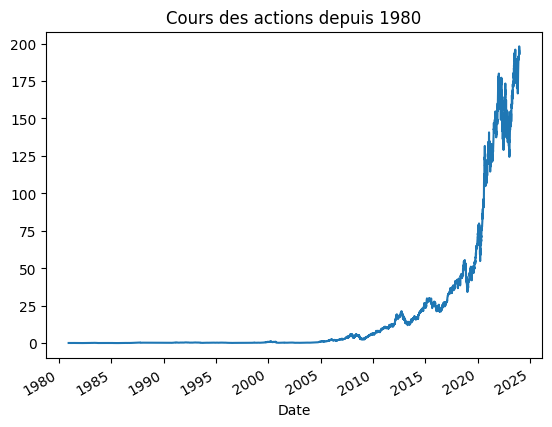

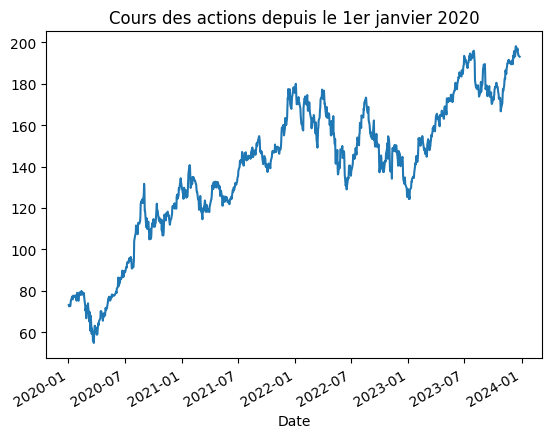

In [233]:
plt.title('Cours des actions depuis 1980')
prix_anc['Close'].plot() # Depuis 1980
plt.show()

plt.title('Cours des actions depuis le 1er janvier 2020')
prix_rec['Close'].plot() # Depuis 2020
plt.show()



### II.2 - Comparaison des valeurs de fermeture et d'ouverture

On définit des grandeurs qui vont nous servir plus tard, pour zoomer sur certaines parties par exemple. En particulier, on change la manière dont on compte le temps. Pour mieux le manipuler, on le transforme en tableau de taille correpondante au nombre de jours écoulés depuis le 2020-01-01

On crée également un split_time, qui va nous permettre de focaliser notre étude et analyse des courbes sur des périodes plus récentes.

In [234]:
time = np.arange(len(df['Close']))  # Intervalle de temps : tous les jours depuis le 2020-01-01

split_time = int(2*len(time)/3)      # Temps à partir duquel on concentre notre étude (arbitraire)

time_valid = time[split_time:] # Temps de validation du modèle 
x_valid = df['Close'][split_time:] # Partie de la courbe qui nous intéresse 

On cherche ici à voir si on peut observer des différences majeures lors de certains jours
On se concentre ici sur l'intervalle le plus récent de l'étude, à partir de 500

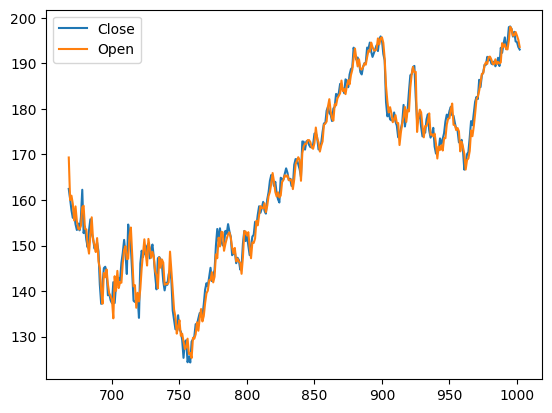

In [235]:
x_ouverture = df['Open'][split_time:] # l'analogue de x_valid avec 'Open' à la place de 'Close'

plt.plot(time_valid, x_valid, label = 'Close')
plt.plot(time_valid, x_ouverture, label = 'Open')
plt.legend()
plt.show()


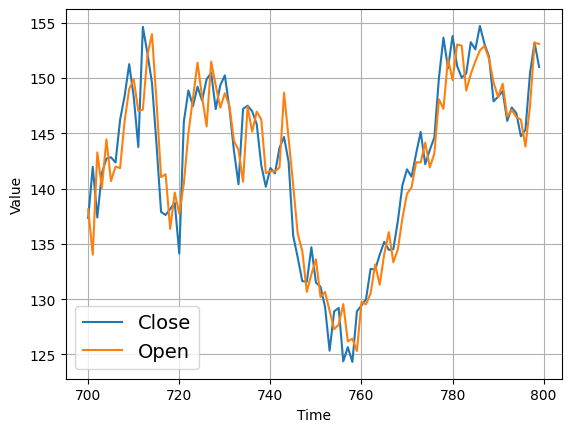

In [236]:
# On peut encore plus zoomer sur des intervalles de temps précis pour percevoir des différences certains jours

plot_series(time[700:800], df['Close'][700:800], label = 'Close')
plot_series(time[700:800], df['Open'][700:800], label = 'Open')
plt.show()

### II.3 - Comparaison des valeurs hautes et des valeurs faibles

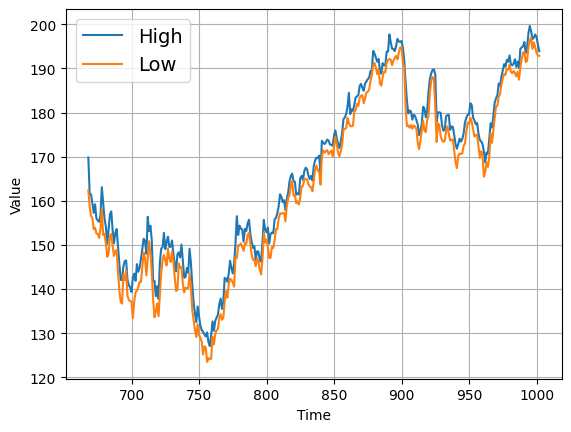

In [237]:
plot_series(time[split_time:], df['High'][split_time:], label = 'High')
plot_series(time[split_time:], df['Low'][split_time:], label = 'Low')
plt.show()

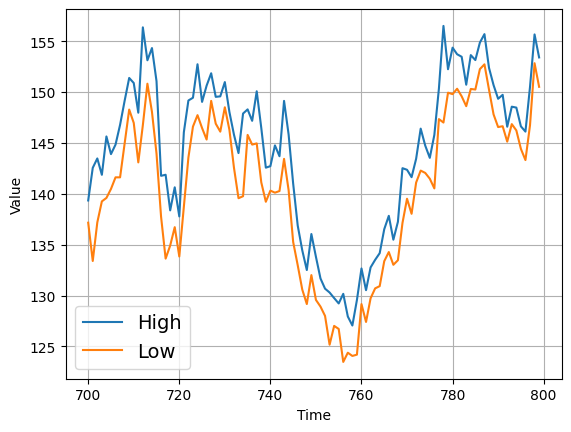

In [238]:
# En zoomant sur un passage intéressant

plot_series(time[700:800], df['High'][700:800], label = 'High')
plot_series(time[700:800], df['Low'][700:800], label = 'Low')
plt.show()

### II.4 - Volume de transaction chaque jour

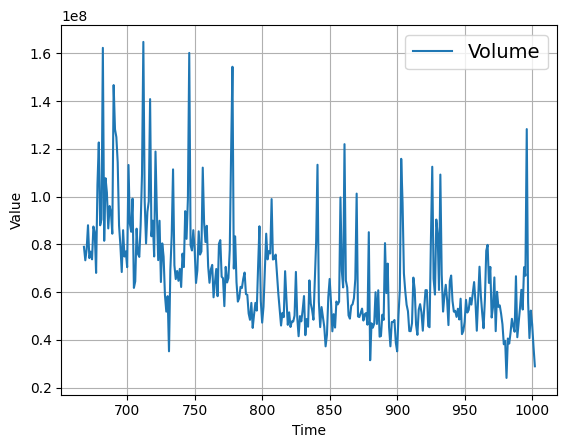

In [239]:
plot_series(time[split_time:], df['Volume'][split_time:], label = 'Volume')

## III - Modélisations pour prédire la valeur future.

In [240]:
df = df[['Date', 'Close']] # On ne garde que la variable de close qui est celle qui nous intéresse pour aller plus vite dans l'éxecution

df

,Date,Close
0,2020-01-02,73.152649
1,2020-01-03,72.441452
2,2020-01-06,73.018700
3,2020-01-07,72.675278
4,2020-01-08,73.844368
...,...,...
998,2023-12-19,196.940002
999,2023-12-20,194.830002
1000,2023-12-21,194.679993
1001,2023-12-22,193.600006


On rappelle le cours de l'action à partir de la moitié du temps écoulé depuis le 01/01/2020

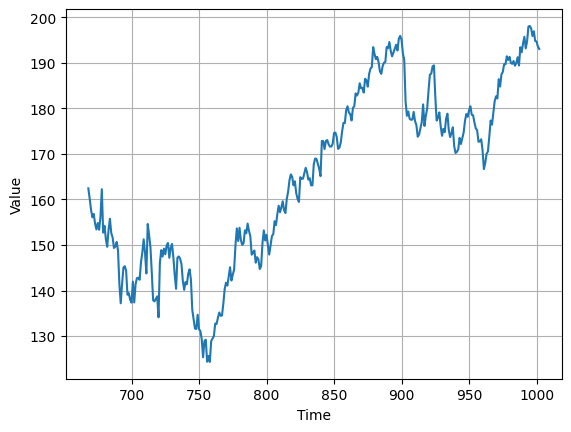

In [241]:
plot_series(time_valid, x_valid) # Visualisation du cours de l'action Apple plus récemment

## III-1 : Modèles simples, sans machine learning

### III-1.A - Moving Average / Moyennes Mouvantes

**Implémentation du modèle**

On peut implémenter notre modèle en un seul code.
Le principe du 'Moving Average' est que chaque valeur prédite par notre modèle est la moyenne des x précédentes valeurs où x est un paramètre à choisir.
Ce modèle permet une bonne prédiction mais surtout de lisser la courbe et son bruit.
Néanmoins l'erreur est supposée être assez importante comparé à des modèles plus developpés

In [242]:
def forecast_moyenne(series, window_size): # Implementation
  """La prochaine valeur est la moyenne des 'window_size' dernières valeurs"""

  forecast = [] # Crée une liste vide appelée forecast pour stocker les prévisions

  for time in range(len(series) - window_size): # On coupe à len(series) - window_size parce que sinon il n'y a plus assez de valeurs
                                                # Pour moyenner les window_size précédentes valeurs

    forecast.append(series[time:time + window_size].mean()) # Ajoute à la liste forecast la moyenne des valeurs sur l'intervalle de taille window size

  return np.array(forecast) # Convertit la liste forecast en un tableau numpy et le renvoie
                            # Ainsi on pourra l'exploiter par la suite

On crée alors notre tableau avec les valeurs modélisées par notre modèle

In [243]:
prix_forecast = forecast_moyenne(df['Close'], 30)[split_time - 30:] # Prédiction de la valeur du prix

# On commence en avance par rapport au temps qui nous intéresse pour pouvoir avoir 'window_size' de temps déja connus
# Ainsi on pourra faire la moyenne des 'window_size' (ici 30) précédentes valeurs pour que à partir de 'split_time'
# les valeurs soient uniquement des valeurs crées par notre modèle 

Première visualisation du résultat obtenu.

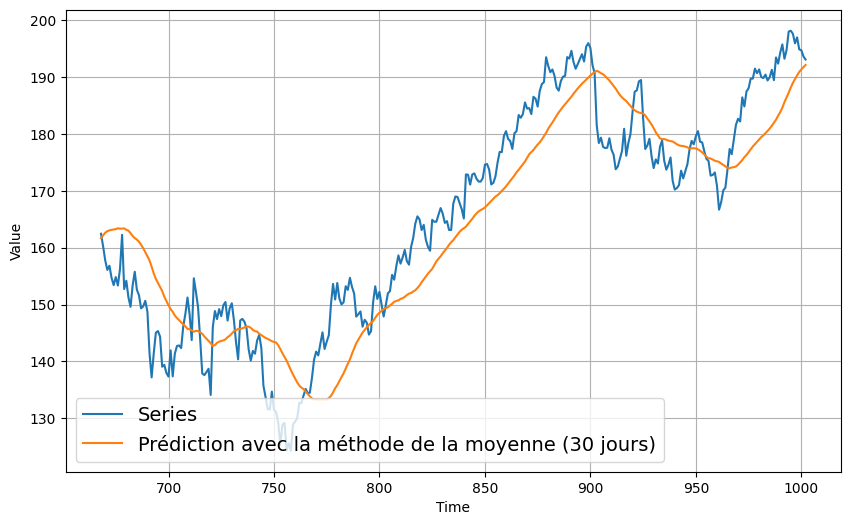

In [244]:
plt.figure(figsize=(10, 6)) # On compare 
plot_series(time_valid, x_valid, label = "Series")
plot_series(time_valid, prix_forecast, label = "Prédiction avec la méthode de la moyenne (30 jours)")

Le résultat est assez satisfaisant, on obtient une belle courbe qui capte bien les variations du cours de l'action.

Essayons de faire varier la fenêtre pour obtenir un modèle plus précis.

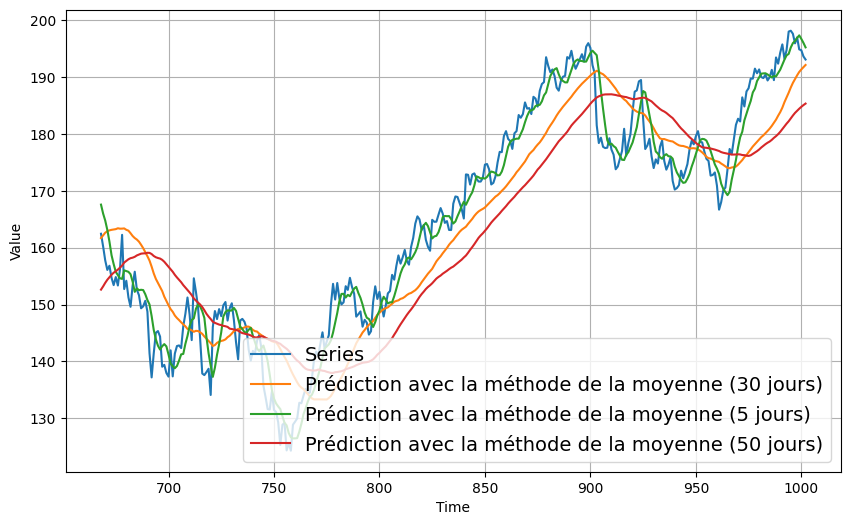

In [245]:
prix_forecast5 = forecast_moyenne(df['Close'], 5)[split_time - 5:]
prix_forecast50 = forecast_moyenne(df['Close'], 50)[split_time - 50:]

plt.figure(figsize=(10, 6)) # On compare 
plot_series(time_valid, x_valid, label = "Series")
plot_series(time_valid, prix_forecast, label = "Prédiction avec la méthode de la moyenne (30 jours)")
plot_series(time_valid, prix_forecast5, label = "Prédiction avec la méthode de la moyenne (5 jours)")
plot_series(time_valid, prix_forecast50, label = "Prédiction avec la méthode de la moyenne (50 jours)")

On comprend dans ce cas précis d'application du modèle de Moving Average que le moins on prend de valeurs dans la fenêtre dont on fait la moyenne, et le plus sera précise notre prédiction.

### III-1.B - Naive forecast

Après avoir remarqué cela, on s'attaque ici dans un second temps à un second modèle sans machine learning.
Il s'agit du modèle de prévision naive où 'Naive Forecast' en anglais.
Le concept du modèle est que chaque valeur que prédit notre modèle à la date T+1 est la valeur à la date précédente (T) de la courbe de base. On peut considérer cela comme un modèle de Moving Average avec une window size égale à 1.

Le modèle est donc très efficace pour les modèles qui ne sont pas soumis à d'énormes variations.

**Implémentation du modèle**

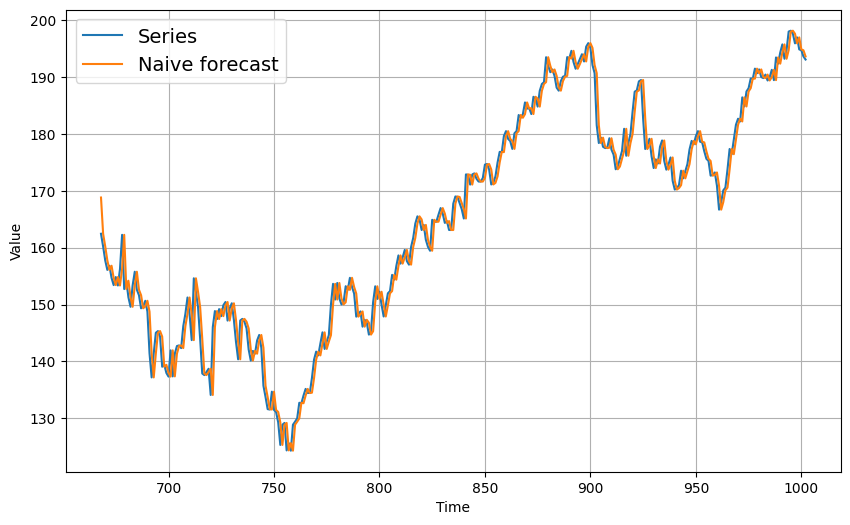

In [246]:
naive_forecast = df['Close'][split_time - 1:-1] # Avec le naive forecast

# Le naive forecast consiste à prédire chaque valeur par la valeur précedente du modèle
# Ici on commence donc à la valeur qui précède l'intervalle qui nous intéresse jusqu'à la fin

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, naive_forecast, label= "Naive forecast")

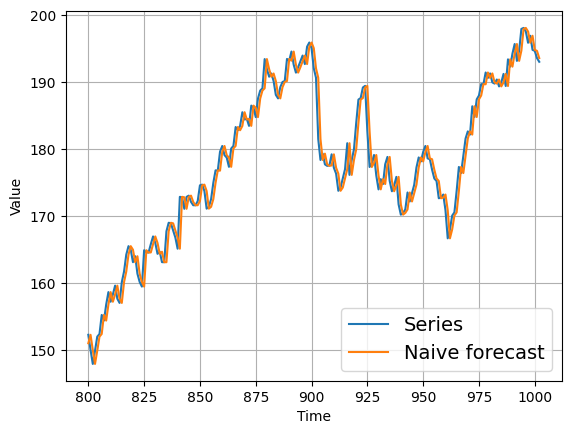

In [247]:
# On zoom sur l'efficacité du naive forecast 

split_time2 = 800
time_naive = time[split_time2:]
x_naive = df['Close'][split_time2:]
naive_forecast2 = df['Close'][split_time2 - 1:-1]
plot_series(time_naive, x_naive, label="Series")
plot_series(time_naive, naive_forecast2, label="Naive forecast")

### III-1.C - Comparaison des deux modèles

Superposons les deux modèles avant de comparer leurs erreurs respectives

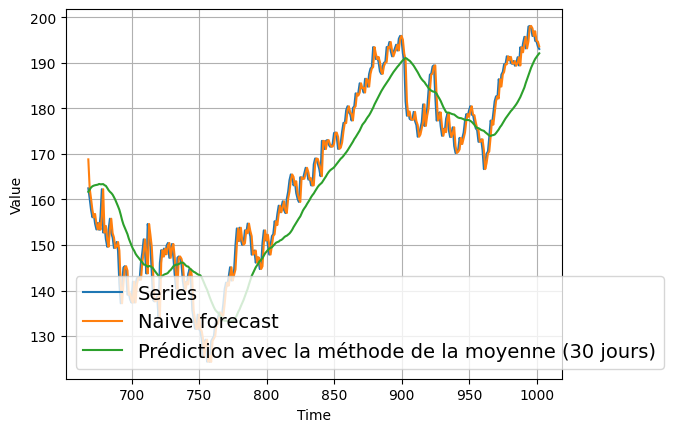

In [248]:
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, naive_forecast, label= "Naive forecast")
plot_series(time_valid, prix_forecast, label = "Prédiction avec la méthode de la moyenne (30 jours)")

Comparaison des erreurs des modèles, on choisit le type d'erreur : mean absolute error

In [249]:
# Erreur des modèles 
import tensorflow as tf 

# Naive forecast 
erreur_naif = tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy() # On utilise le module d'erreurs de la librairie tensorflow
print(f"L'erreur du modèle naif est : {erreur_naif}")
# Mean Absolute Error : différence moyenne absolue

# Forecast moyen 
erreur_30j = tf.keras.metrics.mean_absolute_error(x_valid, prix_forecast).numpy() # On utilise le module d'erreurs de la librairie tensorflow
print(f"L'erreur du modèle de moving average sur 30 jours est : {erreur_30j}")

L'erreur du modèle naif est : 1.9507967820808072
L'erreur du modèle de moving average sur 30 jours est : 6.915815968679551


Le modèle de naive forecast est très efficace ici, tandis que l'erreur du modèle de moving average est assez importante. 
On peut tout de même essayer d'aller plus loin à l'aide d'un modèle faisant appel a du machine learning !

## III-2 - Modélisation avec du machine learning, modèle LSTM

### III-2.A : Préparation pour faire fonctionner le modèle

Le but du modèle choisi, modèle LSTM (Long short-term memory) est de garder quelques valeurs précedentes en mémoire pour prédire la prochaine valeur avec une manière de prédire plus complexe qu'une relation linéaire ou de moyenne.

On commence alors par créer une fonction qui va nous renvoyer notre dataframe avec des colonnes ajoutées : à savoir les valeurs de 'Close' aux 4 jours qui suivent notre date. La quatrième valeur est appelée "Target". Target est ainsi la valeur à T+4 de 'Close'

In [250]:
# On commence par définir nos décalages qui vont nous permettre de prendre les valeurs du futur 
shifts=[-1, -2, -3, -4]

In [251]:

def add_shifted_columns(df, shifts):
  
  for index, Target in enumerate(shifts): # On conserve l'index car il nous servira
                                             # On boucle sur toutes les valeurs pour ajouter toutes les colonnes

    df_temp=df['Close'].shift(Target) # Utilisation de la fonction shift de panda : 
                                         # df.['Close].shift[-1] renvoie la valeur suivante de Close (par rapport au temps dans la boucle)
    if index<(len(shifts)-1):
      col_name=f'Target - {index+1}' # On crée le nom de colonne Target - n (on réequilibre l'index qui commençait à 0)

    else:
      col_name='Target' # Si on est au bout de la liste de décalages, alors on a atteint notre target

    df[col_name]=df_temp # On ajoute la colonne avec son nouveau nom à notre tableau final à l'aide de notre tableau temporaire

    df['Target Date']=df['Date'].shift(-len(shifts)) # On ajoute la date associée au Target final

  return df


In [252]:
# Testons le résultat

df = add_shifted_columns(df,shifts)
df

/var/folders/pm/jc2tztb55jbddh9mt9p3ckn00000gn/T/ipykernel_50686/1213912355.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name]=df_temp # On ajoute la colonne avec son nouveau nom à notre tableau final à l'aide de notre tableau temporaire
/var/folders/pm/jc2tztb55jbddh9mt9p3ckn00000gn/T/ipykernel_50686/1213912355.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target Date']=df['Date'].shift(-len(shifts)) # On ajoute la date associée au Target final
/var/folders/pm/jc2tztb55jbddh9mt9p3

,Date,Close,Target - 1,Target Date,Target - 2,Target - 3,Target
0,2020-01-02,73.152649,72.441452,2020-01-08,73.018700,72.675278,73.844368
1,2020-01-03,72.441452,73.018700,2020-01-09,72.675278,73.844368,75.412880
2,2020-01-06,73.018700,72.675278,2020-01-10,73.844368,75.412880,75.583366
3,2020-01-07,72.675278,73.844368,2020-01-13,75.412880,75.583366,77.198143
4,2020-01-08,73.844368,75.412880,2020-01-14,75.583366,77.198143,76.155716
...,...,...,...,...,...,...,...
998,2023-12-19,196.940002,194.830002,2023-12-26,194.679993,193.600006,193.050003
999,2023-12-20,194.830002,194.679993,NaT,193.600006,193.050003,NaN
1000,2023-12-21,194.679993,193.600006,NaT,193.050003,NaN,NaN
1001,2023-12-22,193.600006,193.050003,NaT,NaN,NaN,NaN


In [253]:
# On replace Target Date au sein du tableau pour plus d'esthétique
ordre_colonnes = ['Date', 'Close', 'Target Date', 'Target - 1', 'Target - 2', 'Target - 3', 'Target']
df = df[ordre_colonnes]

On rappelle que l'existence de trous entre les dates est liée à la fermeture des marchés pendant les week-ends.

On entre plus en profondeur dans la modélisation, ainsi la date originale et la valeur originale de Close ne nous intéressent plus, il vient :

In [254]:
df=df.drop(['Date', 'Close'],axis=1) 

Par la suite, il faut aussi transformer le format de nos paramètres pour qu'ils conviennent à l'utilisation d'un modèle LSTM.
On crée une fonction qui va diviser en 3 catégories nos variables, (Date, Targets - n, Target) et les mettre au bon format.

Il s'agit d'adapter la forme des caractéristiques à une forme qui convient à l'entrée d'un modèle LSTM.

In [255]:
def formatage(df):

    # On commence par les dates 
    dates = df.iloc[:, 0].values

    # Puis les Targets intermédiaires 
    X = df.iloc[:, 1:-1].values.reshape(-1, df.shape[1] - 2, 1).astype(np.float32)

    # -1 : réorganiser les données tout en conservant le même nombre total d'éléments (convention)

    # df.shape[1] - 2 : la nouvelle taille de la deuxième dimension (nombre de colonnes)
                       # Donc ici on garde le nombre de Target intermédiaire en retirant Date et Target Final

    # 1 : Taille de la troisème dimension : représentation d'une série temporelle univariée

    # Et enfin on met le Target au bon format
    Y = df.iloc[:, -1].values.astype(np.float32)

    # De nombreux modèles préfèrent travailler avec des données en virgule flottante 32 bits 
    # plutôt qu'avec des types de données plus larges.

    return dates, X, Y


In [256]:
# On applique à notre data frame 

dates, X, Y = formatage(df) # X représente les Targets Intermédiaires, Y le Target Final

dates.shape, X.shape, Y.shape

((1003,), (1003, 3, 1), (1003,))

Maintenant que nos trois variables, 'dates', 'X' et 'Y' sont au bon format, il y a un autre prérequis au bon fonctionnement d'un modèle LSTM.
Il s'agit de la définition des périodes d'entraînement du modèle, de validation puis de test.
Comme nos variables sont désormées "formatées", elles sont beaucoup plus faciles à utiliser.

In [257]:
def train_val_test(dates, X, Y, train_ratio, val_ratio): # On connaît maintenant les formats des objets pour les découper

    train_index = int(len(dates) * train_ratio) # Nombre de dates sur lesquelles on va s'entraîner
    val_index = train_index + int(len(dates) * val_ratio) # Nombre de dates sur lesquelles on s'entraîne et on valide

    dates_train, X_train, Y_train = dates[:train_index], X[:train_index], Y[:train_index] # Période d'entraînement

    dates_val, X_val, Y_val = dates[train_index:val_index], X[train_index:val_index], Y[train_index: val_index] # Période de validation
    # (qui justifie la définition de val_index)

    dates_test, X_test, Y_test = dates[val_index:], X[val_index:], Y[ val_index:] # Période de test

    return (dates_train, X_train, Y_train), (dates_val, X_val, Y_val), (dates_test, X_test, Y_test)


In [258]:
# On applique à nos dates 

(dates_train, X_train, Y_train), (dates_val, X_val, Y_val), (dates_test, X_test, Y_test) = train_val_test(dates, X, Y, 0.8,0.1)

# On définit 80% d'entrainement, 10% de validation et 10% de test pour notre modèle

Visualisons alors sur notre courbe originale les périodes d'entraînement, de validation et de test du modèle.

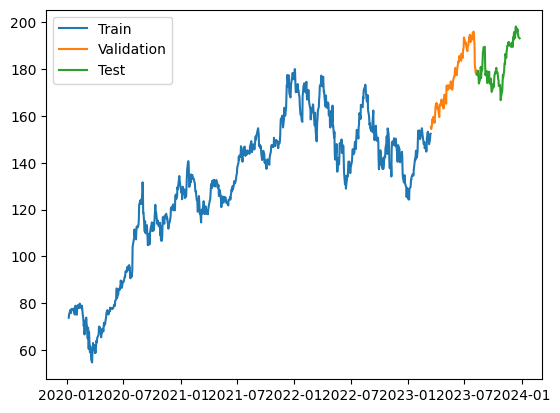

In [259]:
plt.plot(dates_train, Y_train)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, Y_test)

plt.legend(['Train', 'Validation', 'Test']) # Il s'agit en fait de trois courbes 

### III-2.B : Implémentation du modèle

Il est alors l'heure d'expliciter le modèle maintenant que les préparatifs sont prêts. 
Il s'agit comme dit précedemment d'un modèle LSTM qui s'implémente sous la forme suivante :

In [260]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])


Maintenant, on entraîne le modèle sur l'intervalle qu'on lui a consacré pour son entraînement

In [261]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100)

Epoch 1/100


26/26 [==============================] - 1s 13ms/step - loss: 17652.0918 - mean_absolute_error: 129.4758 - val_loss: 30779.8945 - val_mean_absolute_error: 175.0246
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 17004.3047 - mean_absolute_error: 126.9472 - val_loss: 29357.3828 - val_mean_absolute_error: 170.9119
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 15323.6748 - mean_absolute_error: 119.9765 - val_loss: 25641.6953 - val_mean_absolute_error: 159.6585
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 10159.5801 - mean_absolute_error: 95.1827 - val_loss: 14095.5430 - val_mean_absolute_error: 118.0780
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 3291.1892 - mean_absolute_error: 50.4900 - val_loss: 4478.1367 - val_mean_absolute_error: 65.8073
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 964.7424 - mean_absolute_error: 25.4183 - val_loss: 1978.9487 - val_

Avec 100 epochs, il semblerait que la "mean_asolute_error" enregistrée sur l'ensemble d'entraînement stagne rapidement, et qu'il n'est pas nécéssaire de mener l'entraînement à son terme. On constate toutefois que l'erreur sur l'ensemble de validation continue à baisser au fur et à mesure des "epochs". Essayons de visualiser cela avec des graphiques plus explicites.

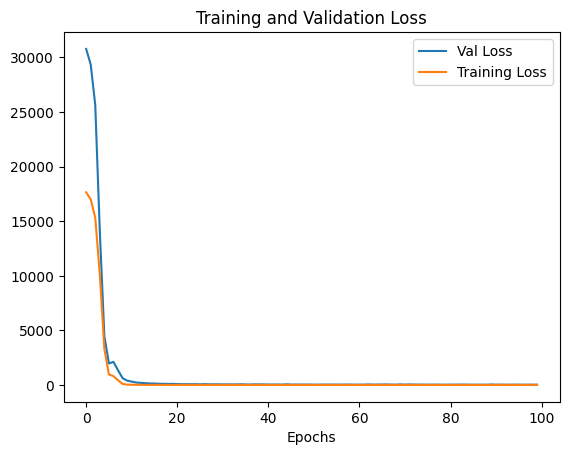

In [262]:
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

On remarque un écart assez important entre les ensembles d'entraînement et de validation aux alentours de la 10ème "epoch". Essayons de zoomer sur les périodes suivantes où les courbes de perte semblent fusionner.

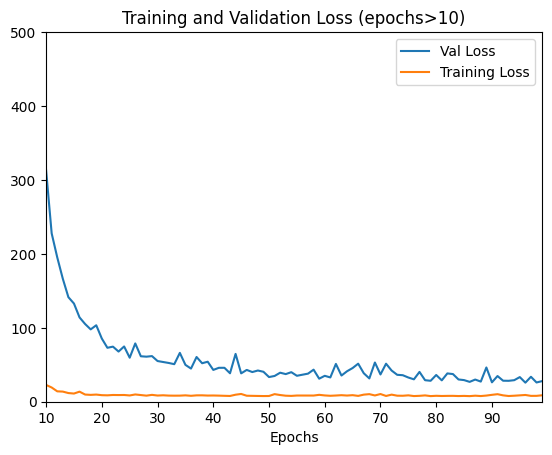

In [263]:
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlim(10, max(history.epoch))
plt.ylim(0, 500)
plt.title('Training and Validation Loss (epochs>10)')
plt.xlabel('Epochs')
plt.legend()
plt.show()



Il apparaît clairement que les valeurs de perte réalisée sur les deux ensembles considérés se stabilisent assez rapidement et augmentent même à certaines étapes dès l'epoch 50.

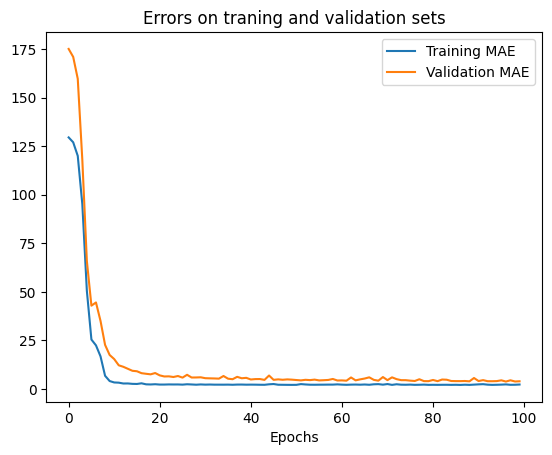

In [264]:
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epochs')
plt.title('Errors on traning and validation sets')
plt.legend()
plt.show()

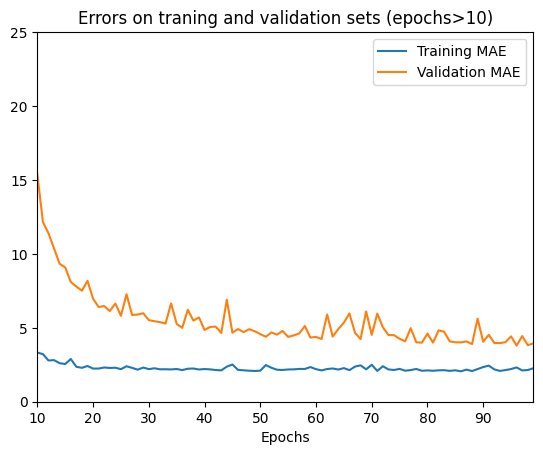

In [265]:
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlim(10, max(history.epoch))
plt.ylim(0, 25)
plt.xlabel('Epochs')
plt.title('Errors on traning and validation sets (epochs>10)')
plt.legend()
plt.show()


Le constat fait précédemment tient encore ici. 


Nous allons alors implementer de l'**EarlyStopping** pour que le modèle s'arrête lorsqu'il ne s'améliore plus, voire se détériore.

In [266]:
from keras.callbacks import EarlyStopping # On importe la méthode

In [267]:
# Puis on la configure
early_stopping = EarlyStopping(
    monitor='val_loss',  # la métrique à surveiller : on ne veut pas que l'erreur de la période de validation ne remonte
    min_delta=0.001,     # changement minimum pour être considéré comme une amélioration
    patience=10,         # nombre d'epochs sans amélioration après lesquelles l'entraînement sera arrêté
    verbose=1,           # pour afficher des messages
    mode='auto' )         # le mode peut être 'auto', 'min', ou 'max'

In [268]:
# On ajoute cela à notre modèle

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, callbacks=[early_stopping])

Epoch 1/100
16/26 [=================>............] - ETA: 0s - loss: 7.5699 - mean_absolute_error: 2.0787

26/26 [==============================] - 0s 4ms/step - loss: 7.7759 - mean_absolute_error: 2.1174 - val_loss: 30.8633 - val_mean_absolute_error: 4.1709
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 8.2780 - mean_absolute_error: 2.1799 - val_loss: 31.7839 - val_mean_absolute_error: 4.2626
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 7.6575 - mean_absolute_error: 2.0757 - val_loss: 56.9764 - val_mean_absolute_error: 6.7264
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 13.6151 - mean_absolute_error: 2.9382 - val_loss: 33.4680 - val_mean_absolute_error: 4.4017
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 8.4457 - mean_absolute_error: 2.1859 - val_loss: 26.2756 - val_mean_absolute_error: 3.8308
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 7.6824 - mean_absolute_error: 2.0896 - val_loss: 28.1419 - val_mean_absolute_error: 3.9648
Epoch 7/100
26/26 [========

On voit effectivement que notre modèle s'arrête tôt (à la **19ème** étape). Il n'était donc pas nécessaire d'aller jusqu'à 100 epochs. 


**Visualisons** désormais concrètement les prédictions faites par notre modèle par rapport aux observations réelles.

### II-2.C : Visualisation du modèle

26/26 [==============================] - 0s 800us/step


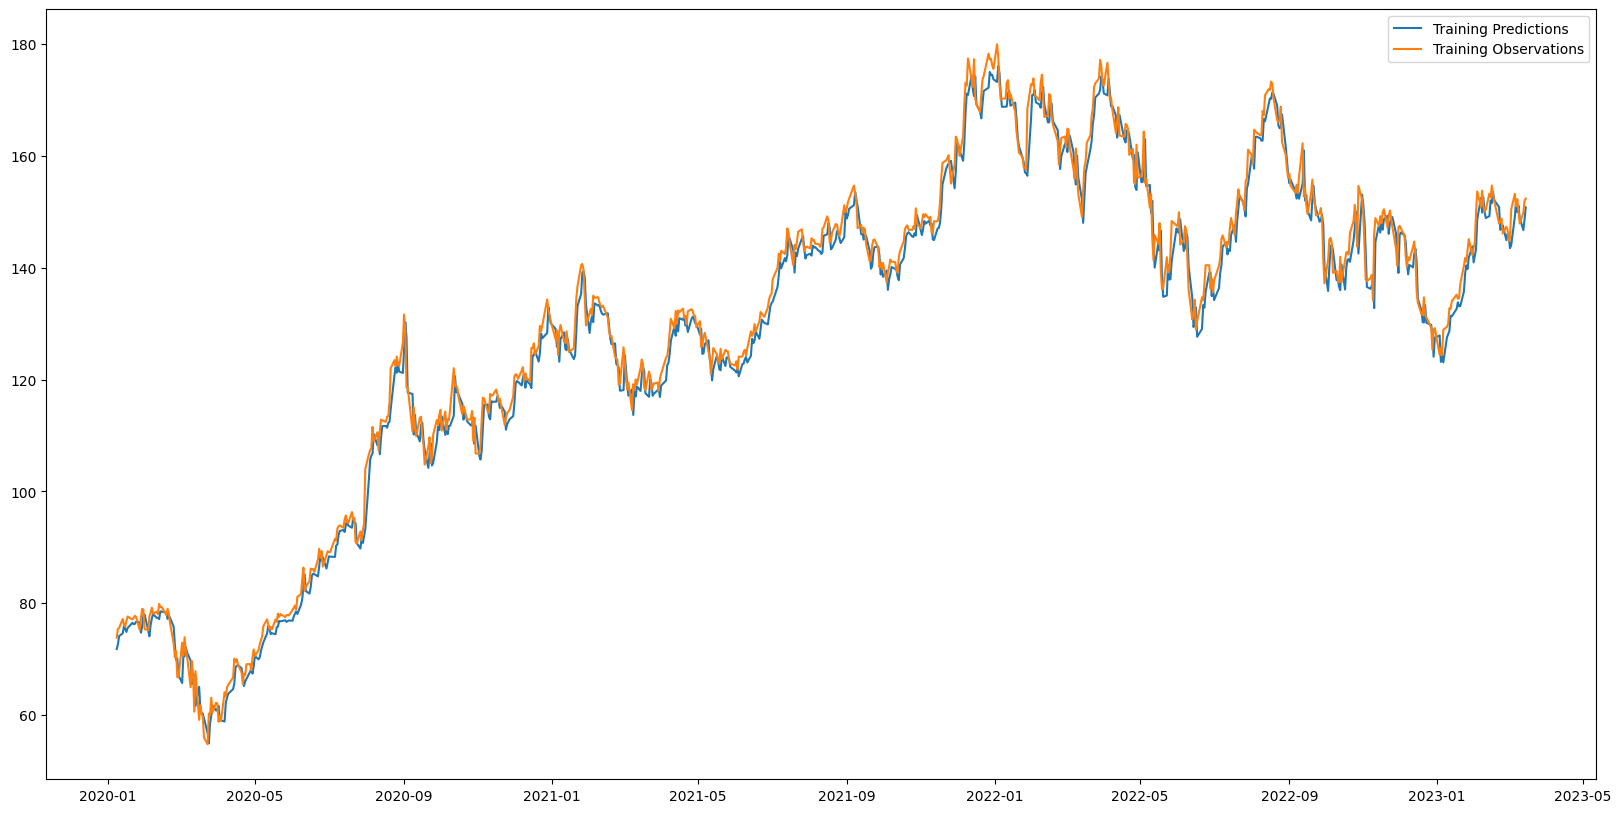

In [269]:
# Intervalle d'entraînement 

train_predictions = model.predict(X_train).flatten()
plt.figure(figsize=(20,10))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 2ms/step


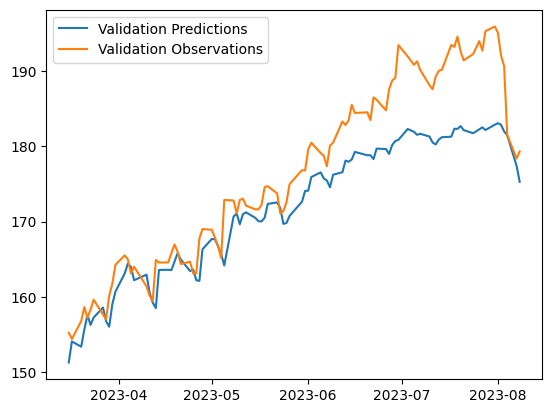

In [270]:
# De même avec la période de validation 

val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 [==============================] - 0s 1ms/step


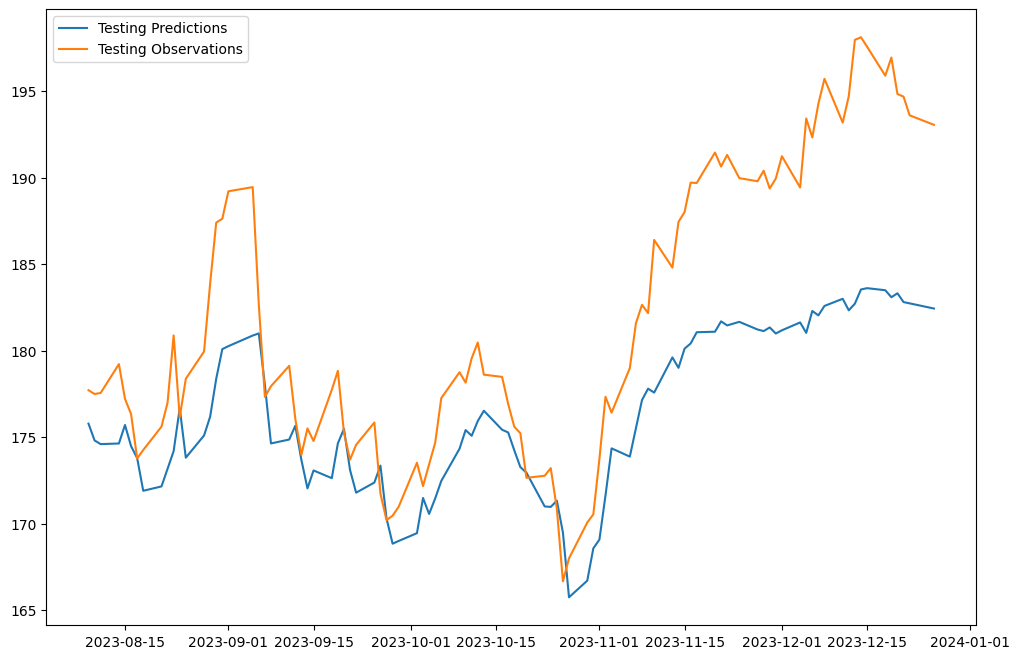

In [271]:
# Et enfin sur la partie de tests :

test_predictions = model.predict(X_test).flatten()
plt.figure(figsize=(12,8))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

À vue d'oeil, ce sont des **résultats satisfaisants**. Le modèle semble en effet bien capter les variations du cours de l'action.

On peut essayer de tout regrouper pour avoir une vue d'ensemble de notre modèle comparé à la réalité !

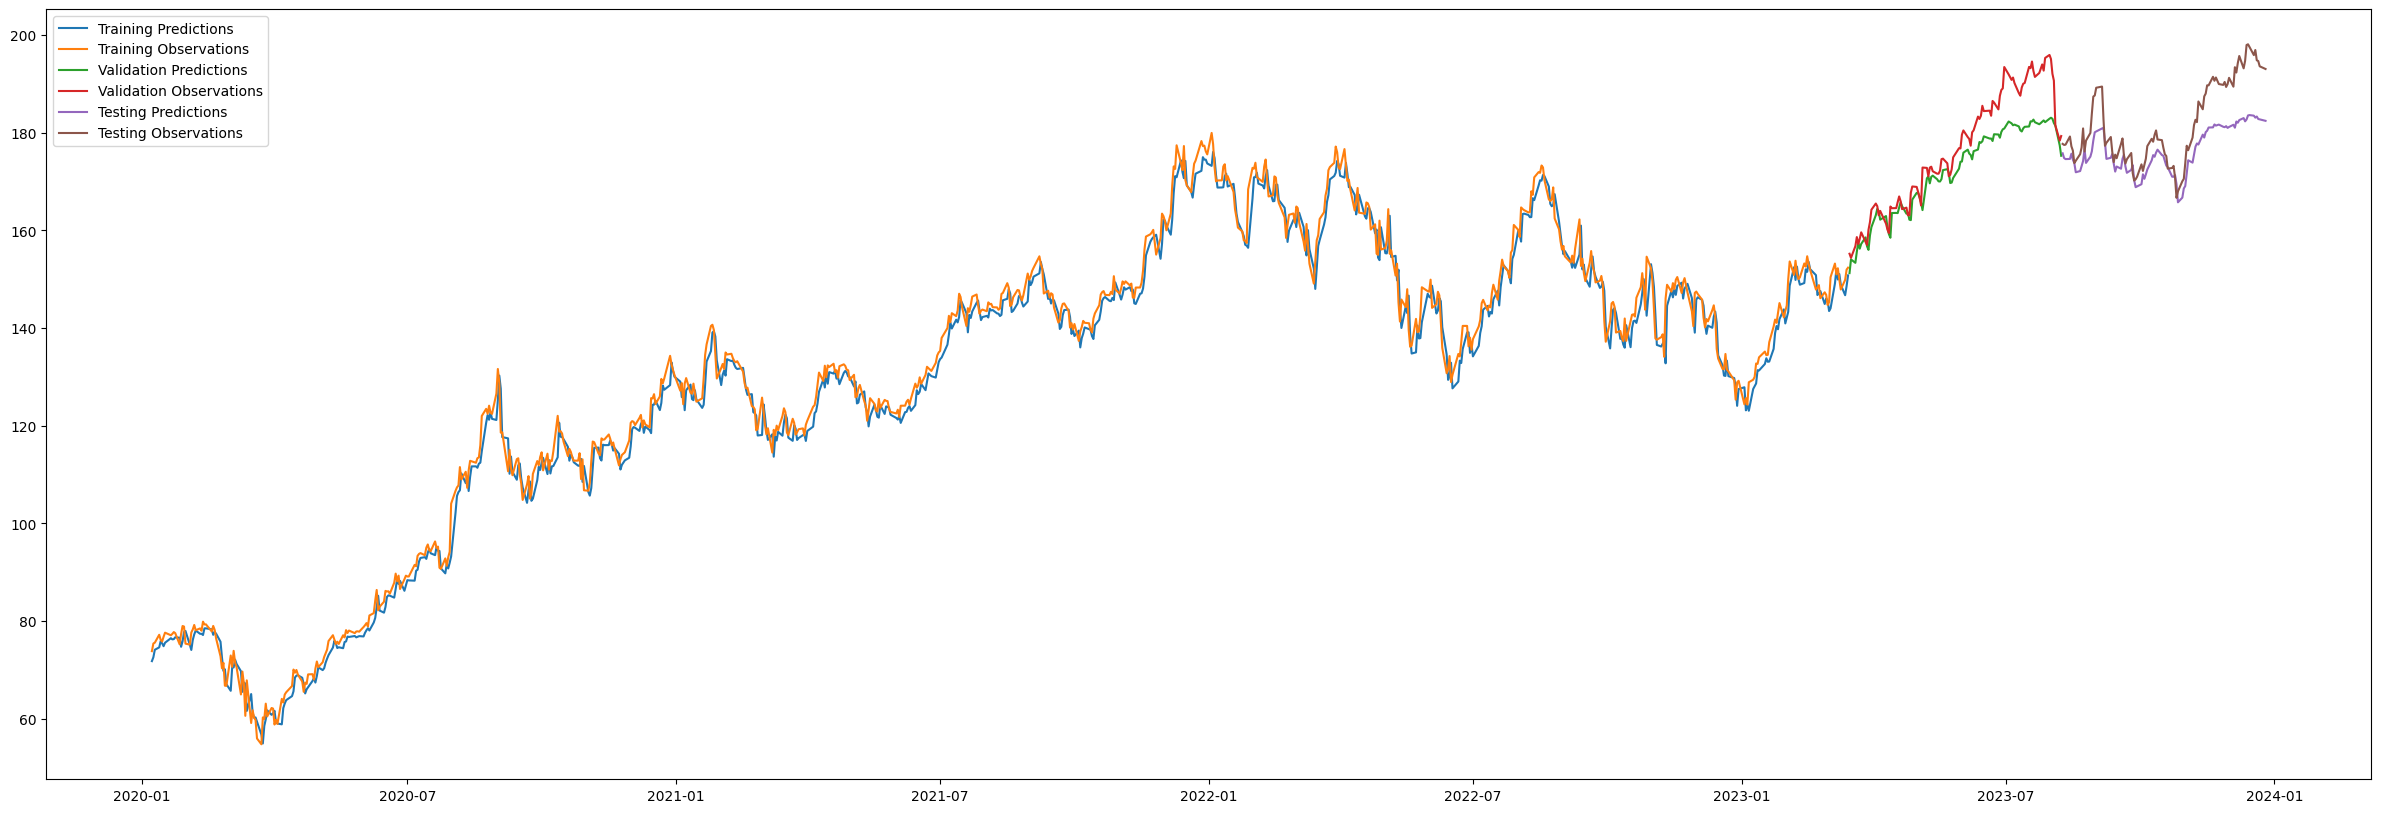

In [272]:
plt.figure(figsize=(30, 10))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

### III-2.D Erreurs du modèle

In [273]:
import tensorflow as tf

In [274]:
print(f"L'erreur moyenne sur l'ensemble d'entraînement est de {tf.keras.metrics.mean_absolute_error(train_predictions, Y_train).numpy()}")
print(f"L'erreur moyenne sur l'ensemble de validation est de {tf.keras.metrics.mean_absolute_error(val_predictions, Y_val).numpy()}")

L'erreur moyenne sur l'ensemble d'entraînement est de 2.352043628692627
L'erreur moyenne sur l'ensemble de validation est de 4.697137355804443


L'erreur est assez faible, logiquement, sur l'ensemble d'entraînement mais aussi sur celui de validation.
Intéressons nous désormais à l'erreur du modèle lorsqu'il est amené à **généraliser** :

En raison du modèle que nous avons utilisé, avec le système de 'Target', il se crée 4 futures dates non valides (ici appelées **NaN** autoamtiquement), qui apparaissent dans dates_test. Celles-ci empêchent d'afficher l'erreur sur l'ensemble de test comme nous l'avons fait pour les deux ensembles précédents. Il faut procéder à un **pré-traitement**.

In [275]:
print(dates_test)

['2023-08-09T00:00:00.000000000' '2023-08-10T00:00:00.000000000'
 '2023-08-11T00:00:00.000000000' '2023-08-14T00:00:00.000000000'
 '2023-08-15T00:00:00.000000000' '2023-08-16T00:00:00.000000000'
 '2023-08-17T00:00:00.000000000' '2023-08-18T00:00:00.000000000'
 '2023-08-21T00:00:00.000000000' '2023-08-22T00:00:00.000000000'
 '2023-08-23T00:00:00.000000000' '2023-08-24T00:00:00.000000000'
 '2023-08-25T00:00:00.000000000' '2023-08-28T00:00:00.000000000'
 '2023-08-29T00:00:00.000000000' '2023-08-30T00:00:00.000000000'
 '2023-08-31T00:00:00.000000000' '2023-09-01T00:00:00.000000000'
 '2023-09-05T00:00:00.000000000' '2023-09-06T00:00:00.000000000'
 '2023-09-07T00:00:00.000000000' '2023-09-08T00:00:00.000000000'
 '2023-09-11T00:00:00.000000000' '2023-09-12T00:00:00.000000000'
 '2023-09-13T00:00:00.000000000' '2023-09-14T00:00:00.000000000'
 '2023-09-15T00:00:00.000000000' '2023-09-18T00:00:00.000000000'
 '2023-09-19T00:00:00.000000000' '2023-09-20T00:00:00.000000000'
 '2023-09-21T00:00:00.000

Comme nous le voyons ici, à chacune de ces dates est associée la valeur réelle de l'action, et comme les valeurs futures ne sont pas dans le modèle de base, la valeur affichée est **NaN**.

In [276]:
print(Y_test)

[177.71556 177.49615 177.55608 179.22389 177.21652 176.33769 173.77107
 174.26042 175.60864 176.99681 180.8817  176.14793 178.375   179.95293
 183.87775 187.4031  187.62282 189.21074 189.45041 182.66934 177.32639
 177.94556 179.12401 176.06804 173.98079 175.50879 174.77972 177.73584
 178.8344  175.25911 173.70116 174.56001 175.84833 171.73375 170.20575
 170.46542 170.98474 173.5214  172.17317 173.43152 174.67987 177.25648
 178.7545  178.15529 179.56343 180.47224 178.61469 178.48486 176.91692
 175.60864 175.22916 172.65254 172.77238 173.2118  170.8749  166.67043
 167.99867 170.06593 170.54532 173.7411  177.33638 176.41757 178.99419
 181.58078 182.64937 182.17    186.4     184.8     187.44    188.01
 189.71    189.69    191.45    190.64    191.31    189.97    189.79
 190.4     189.37    189.95    191.24    189.43    193.42    192.32
 194.27    195.71    193.18    194.71    197.96    198.11    197.57
 195.89    196.94    194.83    194.68    193.6     193.05          nan
       nan       n

Cependant, notre modèle de prédiction a créé une valeur pour la date qui suit l'extraction du fichier (ici le 27 octobre), et ne comporte donc plus que 3 dates sans valeur associée.

In [277]:
print(test_predictions)

[175.7836  174.81247 174.59982 174.63678 175.7056  174.48132 173.79428
 171.90382 172.15584 173.17372 174.19632 176.67667 173.81752 175.09961
 176.18568 178.37866 180.08951 180.26147 180.87466 180.99786 178.01447
 174.63911 174.86578 175.66022 173.69046 172.04114 173.0784  172.63245
 174.64587 175.48114 173.10611 171.79422 172.37982 173.35794 170.30466
 168.84567 169.00385 169.45453 171.48697 170.56483 171.46417 172.47012
 174.33253 175.41187 175.08052 175.93289 176.53006 175.43044 175.27386
 174.24612 173.27274 172.94987 170.99998 170.97061 171.33061 169.49156
 165.74965 166.7081  168.5787  169.0846  171.63245 174.3553  173.8779
 175.51642 177.14526 177.8045  177.5769  179.61078 179.00839 180.11621
 180.41537 181.06567 181.09465 181.69406 181.45966 181.66507 181.22331
 181.13097 181.3436  180.99034 181.17662 181.63107 181.02919 182.29317
 182.04008 182.58493 182.99802 182.33086 182.71701 183.53548 183.61234
 183.49263 183.08728 183.31747 182.80768 182.73466 182.43518 182.25749
       

Pour calculer l'erreur moyenne selon la méthode mean absolute error du modèle sur la partie test, nous nous débarassons de ces valeurs non valides.

In [278]:
# Ainsi on cherche d'abord les indices dont se débarasser 
nan_indices_test_predictions = np.isnan(test_predictions)
print("Indices des valeurs nan dans test_predictions:", np.where(nan_indices_test_predictions)[0])

nan_indices_Y_test = np.isnan(Y_test)
print("Indices des valeurs nan dans Y_test:", np.where(nan_indices_Y_test)[0])

Indices des valeurs nan dans test_predictions: [ 98  99 100]
Indices des valeurs nan dans Y_test: [ 97  98  99 100]


Et on calcule l'erreur de notre modèle comparé à la réalité, l'erreur de la période de test étant celle qui compte réellement pour vérifier que le modèle marche bien.

In [279]:
premier_nan =  np.where(nan_indices_Y_test)[0][0] # la première date manquante dans nos dates de la période de test

In [280]:
erreur_lstm = tf.keras.metrics.mean_absolute_error(test_predictions[:premier_nan], Y_test[:premier_nan]).numpy()
print(f"L'erreur moyenne du modèle LSTM  sur l'ensemble de test est : {erreur_lstm}")

L'erreur moyenne du modèle LSTM  sur l'ensemble de test est : 5.517589569091797


Rappelons l'erreur que nous trouvions avec le modèle naif, qui était le plus efficace sans machine learning :

In [281]:
print(f"L'erreur moyenne du modèle de Naive Forecasting est : {erreur_naif}")

L'erreur moyenne du modèle de Naive Forecasting est : 1.9507967820808072


Le modèle de Naive Forecasting, aussi **simple** puisse-t-il être, permet d'obtenir de **meilleures performances** que les réseaux neuronaux LSTMs.

### III-2.E - Conclusion sur le choix du modèle

Avec le modèle LTSM, on obtient toujours une erreur plus importante que sur un modèle simple tel que le naive forecasting.

Ainsi, pour déterminer la valeur de l'action demain, nous allons nous fier à la valeur donnée par le modèle de naive forecasting plutôt que la valeur donnée par le modèle LSTM. C'est ce modèle que nous allons éxecuter dans le dossier **TradingAlgo.ipynb** .

## IV - Bonus - Prédiction de la valeur future avec le LSTM

On a vu que le modèle plus efficace pour prédire l'action du lendemain était le modèle de naive forecasting

Mais, pour tout de même utiliser notre modèle LSTM, on peut s'intéresser à la valeur du lendemain prédite même si elle est théoriquement plus éloignée de la réalité que ce donne le modèle du naive forecasting.

On cherche dans un premier temps l'indice de la valeur qu'on cherche à prédire

In [282]:
indice_prediction = np.where(nan_indices_Y_test)[0][0] # Indice de la valeur ou le modèle a crée une valeur

C'est la première date à partir de laquelle il n'y pas de valeur de prix associée, c'est donc la date de demain à laquelle le modèle va associer une prédiction.

Voici la prédiction associée :

In [283]:
valeur_prediction = test_predictions[indice_prediction]
valeur_prediction

182.25749

Il s'agit alors de comparer avec la valeur précedente, et dire si on achète ou non :

In [284]:
def acheter_ou_non():
   if valeur_prediction > test_predictions[indice_prediction-1]:
      return 'ACHETER'
   else:
      return 'NE PAS ACHETER'

acheter_ou_non()

'NE PAS ACHETER'

Le résultat peut être différent de ce que nous trouverons avec le modèle de naive forecasting, qui est le vrai modèle à suivre dans le cadre du projet.